In [16]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")
from pathlib import Path

import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import basedosdados as bd
from shapely.wkt import loads

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 200

### Observações

- Os dados utilizados nos tratamentos se encontram na pasta do [Google Drive](https://drive.google.com/drive/folders/1TQjha0aPdBLfBGek8Bl48cmdGbX_j_qC)

### Shapes

- Trem
- VLT
- Transbrasil – Linha 62
- Transolimpica - 
- Transcarioca
- Transoeste

In [17]:
### SHAPES TP RJ

query = """
SELECT 
  CASE 
    WHEN id_modal_smtr = '10' THEN "Metrô"
    WHEN id_modal_smtr = '11' THEN "Trem"
    WHEN id_modal_smtr = '12' THEN "VLT"
    WHEN id_modal_smtr = '13' THEN "Bonde"
    WHEN id_modal_smtr = '14' THEN "Plano Inclinado"
    WHEN id_modal_smtr = '20' THEN "BRT"
    WHEN id_modal_smtr = '21' THEN "BHLS"
    WHEN id_modal_smtr = '22' THEN "SPPO"
    WHEN id_modal_smtr = '23' THEN "SPPO Executivo"
    WHEN id_modal_smtr = '30' THEN "DETRO RMTJ"
    WHEN id_modal_smtr = '31' THEN "Varia conforme região"
    WHEN id_modal_smtr = '32' THEN "Varia conforme região"
    WHEN id_modal_smtr = '33' THEN "Varia conforme região"
    WHEN id_modal_smtr = '34' THEN "Varia conforme região"
    WHEN id_modal_smtr = '35' THEN "Varia conforme região"
    WHEN id_modal_smtr = '36' THEN "Varia conforme região"
    WHEN id_modal_smtr = '37' THEN "Varia conforme região"
    WHEN id_modal_smtr = '38' THEN "Varia conforme região"
    WHEN id_modal_smtr = '39' THEN "Varia conforme região"
    WHEN id_modal_smtr = '40' THEN "STPL"
    WHEN id_modal_smtr = '41' THEN "STPC"
    WHEN id_modal_smtr = '50' THEN "Barcas"
    WHEN id_modal_smtr = '60' THEN "Teleferico"
 END AS id_modal_smtr,
  * EXCEPT(
    versao,
    id_modal_smtr
    )
FROM `rj-smtr.br_rj_riodejaneiro_sigmob.shapes_geom` 
WHERE data_versao = "2022-03-10"
"""

shapes = bd.read_sql(query,billing_project_id='rj-escritorio-dev',  use_bqstorage_api=True)
shapes.to_csv('data/raw/shapes_transporte_rj_sigmob.csv', index=False)

Downloading: 100%|███████████████████████████████████████████████████████████████████████████| 1351/1351 [01:09<00:00, 19.39rows/s]


In [18]:
shapes = gpd.read_file('data/raw/shapes_transporte_rj_sigmob.csv')

In [19]:
corredor_dict = {
    '62': 'TransBrasil',
    '55': 'TransOlímpica',
    '46': 'TransCarioca',
    '42A': 'TransCarioca',
    '53': 'TransOlímpica',
    '18': 'TransOeste',
    '17': 'TransOeste',
    '20': 'TransOeste',    
}

shapes['corredor'] = shapes['linha_gtfs'].apply(lambda x: corredor_dict.get(x))

In [20]:
a = shapes[shapes['corredor'] == 'TransCarioca']

In [62]:
shapes['geometry'] = shapes['shape'].apply(loads)

In [63]:
corredores = shapes[~shapes['corredor'].isna()].dissolve('corredor')

<AxesSubplot:>

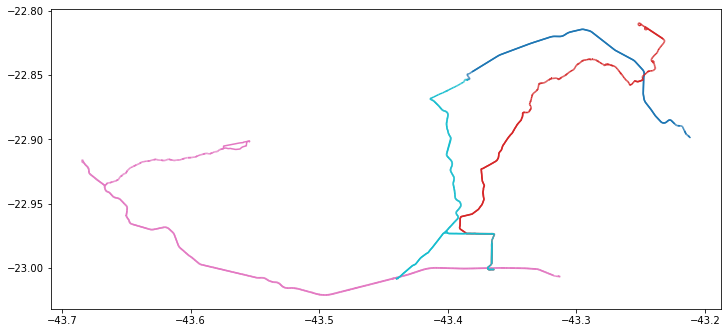

In [64]:
corredores.reset_index().plot(column = 'corredor', figsize=(12,12))

In [97]:
corredores = corredores.reset_index()[['corredor', 'geometry']]
corredores.to_csv('data/treated/shapes/corredores.csv', index=False)



### shapes Metro, VLT, Trem

<AxesSubplot:>

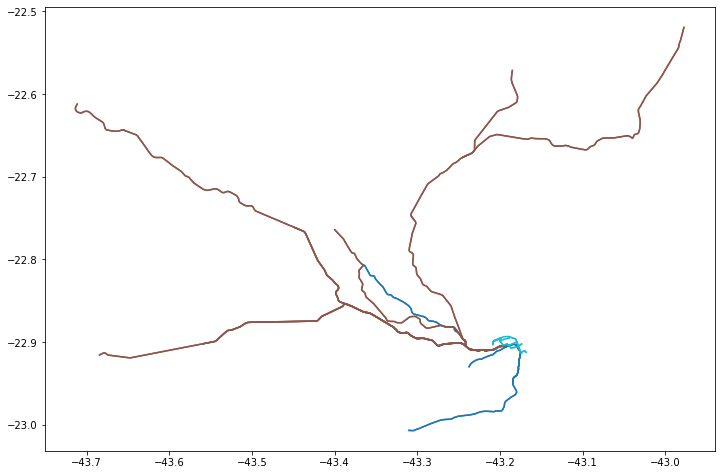

In [145]:
outros = shapes[shapes['id_modal_smtr'].isin(['Metrô', 'VLT', 'Trem'])]
outros.plot(column='id_modal_smtr', figsize=(12,12))

In [148]:
outros = outros[['id_modal_smtr', 'geometry']]
outros.to_csv('data/treated/shapes/trem_metro_vlt.csv', index=False)




### Estações com data de abertura

- Transolimpica
- Transcarioca
- Transoeste
- Transbrasil


In [70]:
estacoes = pd.read_csv('data/raw/estacoes_brt_georeferenciadas.csv')

In [129]:
estacoes.head()

,date,stop_id,stop_name,var,reaberto,geometry,lon,lat,buffer
0,2021-01-01 12:12:12,107010205011359,Caju - Igrejinha,3.75,transbrasil,POINT (-43.22010 -22.88939),-43.220098,-22.88939,"POLYGON ((-43.21810 -22.88939, -43.21811 -22.88959, -43.21814 -22.88978, -43.21818 -22.88997, -43.21825 -22.89016, -43.21833 -22.89033, -43.21844 -22.89050, -43.21855 -22.89066, -43.21868 -22.8908..."
1,2021-01-01 12:12:12,424128201001600,Afrânio Costa,3.75,nao,POINT (-43.33513 -23.00056),-43.335130,-23.00056,"POLYGON ((-43.33313 -23.00056, -43.33314 -23.00076, -43.33317 -23.00095, -43.33322 -23.00114, -43.33328 -23.00133, -43.33337 -23.00150, -43.33347 -23.00167, -43.33358 -23.00183, -43.33372 -23.0019..."
2,2021-01-01 12:12:12,526151201000100,Pingo dÁgua,3.75,nao,POINT (-43.64730 -22.96480),-43.647300,-22.96480,"POLYGON ((-43.64530 -22.96480, -43.64531 -22.96500, -43.64534 -22.96519, -43.64539 -22.96538, -43.64545 -22.96557, -43.64554 -22.96574, -43.64564 -22.96591, -43.64575 -22.96607, -43.64589 -22.9662..."
3,2021-01-01 12:12:12,311045205006559,Mercado São Sebastião,3.75,transbrasil,POINT (-43.28390 -22.81963),-43.283901,-22.81963,"POLYGON ((-43.28190 -22.81963, -43.28191 -22.81983, -43.28194 -22.82002, -43.28199 -22.82021, -43.28205 -22.82040, -43.28214 -22.82057, -43.28224 -22.82074, -43.28235 -22.82090, -43.28249 -22.8210..."
4,2021-01-01 12:12:12,519149201000600,Santa Veridiana,3.75,nao,POINT (-43.66522 -22.94047),-43.665220,-22.94047,"POLYGON ((-43.66322 -22.94047, -43.66323 -22.94067, -43.66326 -22.94086, -43.66331 -22.94105, -43.66337 -22.94124, -43.66346 -22.94141, -43.66356 -22.94158, -43.66367 -22.94174, -43.66381 -22.9418..."


In [73]:
estacoes = gpd.GeoDataFrame(estacoes)

In [75]:
estacoes_brasil = gpd.read_file('data/raw/shapes_transporte_rj_sigmob.csv')

In [76]:
estacoes_brasil

,id_modal_smtr,trip_id,shape_id,route_id,linha_gtfs,shape,shape_distance,start_pt,end_pt,data_versao,geometry
0,BRT,B0010AAF0AIDU01,B0010AAF0AIDU01,B0010AAF0A,10,"LINESTRING(-43.6836888677667 -22.9166827458597, -43.683734 -22.9165757, -43.6837402909456 -22.9165305515707, -43.6837485870652 -22.9164840020975, -43.683754735125 -22.916412485611, -43.68376306791...",39187.2,POINT(-43.6836888677667 -22.9166827458597),POINT(-43.3661920294139 -23.0010143431891),2022-03-10,None
1,BRT,B0010AAF0AVDU01,B0010AAF0AVDU01,B0010AAF0A,10,"LINESTRING(-43.3661920294139 -23.0010143431891, -43.3663288650637 -23.00101658347, -43.3669750036457 -23.0010271620864, -43.3672589486012 -23.0010318108486, -43.3675617745339 -23.0010367687309, -4...",38797.3,POINT(-43.3661920294139 -23.0010143431891),POINT(-43.683370291879 -22.9175360210858),2022-03-10,None
2,BRT,B0011AAB0AIDU01,B0011AAB0AIDU01,B0011AAB0A,11,"LINESTRING(-43.6836888677667 -22.9166827458597, -43.683734 -22.9165757, -43.6837402909456 -22.9165305515707, -43.6837485870652 -22.9164840020975, -43.683754735125 -22.916412485611, -43.68376306791...",39230.3,POINT(-43.6836888677667 -22.9166827458597),POINT(-43.3661920294139 -23.0010143431891),2022-03-10,None
3,BRT,B0011AAB0AVDU01,B0011AAB0AVDU01,B0011AAB0A,11,"LINESTRING(-43.3661920294139 -23.0010143431891, -43.3663288650637 -23.00101658347, -43.3669750036457 -23.0010271620864, -43.3672589486012 -23.0010318108486, -43.3675617745339 -23.0010367687309, -4...",38788.6,POINT(-43.3661920294139 -23.0010143431891),POINT(-43.683370291879 -22.9175360210858),2022-03-10,None
4,BRT,B0012AAF0AIDU01,B0012AAF0AIDU01,B0012AAF0A,12,"LINESTRING(-43.6472882712735 -22.9649119735316, -43.6471442 -22.9650774, -43.6470518 -22.9651621, -43.6469676 -22.9652223, -43.6468065 -22.9653364, -43.6462286 -22.9657026, -43.6461581 -22.9657472...",31814.1,POINT(-43.6472882712735 -22.9649119735316),POINT(-43.3661920294139 -23.0010143431891),2022-03-10,None
5,BRT,B0012AAF0AVDU01,B0012AAF0AVDU01,B0012AAF0A,12,"LINESTRING(-43.3661920294139 -23.0010143431891, -43.3663288650637 -23.00101658347, -43.3669750036457 -23.0010271620864, -43.3672589486012 -23.0010318108486, -43.3675617745339 -23.0010367687309, -4...",31723.4,POINT(-43.3661920294139 -23.0010143431891),POINT(-43.6471759645778 -22.9648246731758),2022-03-10,None
6,BRT,B0013AAF0AIDU01,B0013AAF0AIDU01,B0013AAF0A,13,"LINESTRING(-43.5971368469713 -22.9936127394984, -43.5963418 -22.9942844, -43.5962083 -22.9943973, -43.5961543 -22.9944427, -43.5961078 -22.9944846, -43.5958951 -22.9946762, -43.5956339 -22.994895,...",25094.4,POINT(-43.5971368469713 -22.9936127394984),POINT(-43.3661920294139 -23.0010143431891),2022-03-10,None
7,BRT,B0013AAF0AVDU01,B0013AAF0AVDU01,B0013AAF0A,13,"LINESTRING(-43.3661920294139 -23.0010143431891, -43.3663288650637 -23.00101658347, -43.3669750036457 -23.0010271620864, -43.3672589486012 -23.0010318108486, -43.3675617745339 -23.0010367687309, -4...",25032.3,POINT(-43.3661920294139 -23.0010143431891),POINT(-43.5972535 -22.9933284),2022-03-10,None
8,BRT,B0014AAF0AIDU01,B0014AAF0AIDU01,B0014AAF0A,14,"LINESTRING(-43.6328203674445 -22.9167685192428, -43.63300315049 -22.91680394616, -43.63314676468 -22.91683178138, -43.6335218 -22.9169489, -43.63360843526 -22.91696493289, -43.63376076521 -22.9169...",31921.9,POINT(-43.6328203674445 -22.9167685192428),POINT(-43.4417317 -23.0081457),2022-03-10,None
9,BRT,B0014AAF0AIDU02,B0014AAF0AIDU02,B0014AAF0A,14,"LINESTRING(-43.6328203674445 -22.9167685192428, -43.63300315049 -22.91680394616, -43.63314676468 -22.91683178138, -43.6335218 -22.9169489, -43.63360843526 -22.91696493289, -43.63376076521 -22.9169...",32388.7,POINT(-43.6328203674445 -22.9167685192428),POINT(-43.4404352060989 -23.0083323067792),2022-03-10,None


In [79]:
estacoes['geometry'] = estacoes['geometry'].apply(loads)

In [105]:
estacoes['buffer'] = estacoes['geometry'].apply(lambda x: x.buffer(0.002))

<AxesSubplot:>

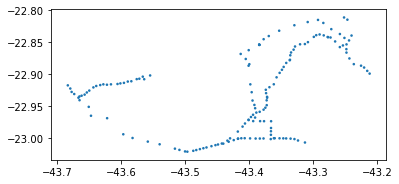

In [106]:
estacoes['buffer'].plot()

In [ ]:
estacoes[['stop_id', 'buffer']]

In [109]:
estacoes_corr = gpd.sjoin(corredores, gpd.GeoDataFrame(estacoes[['stop_id', 'buffer']], geometry='buffer'))

In [111]:
len(estacoes_corr) == len(estacoes)

False

In [122]:
pd.merge(estacoes_corr[['corredor', 'stop_id']], estacoes[['stop_id', 'geometry']]

,corredor,stop_id
0,TransBrasil,107010205012699
0,TransBrasil,107010205011659
0,TransBrasil,107010205011359
0,TransBrasil,107010205012159
0,TransBrasil,310039205003359
0,TransBrasil,310039205002659
0,TransBrasil,310040205005559
0,TransBrasil,310040205006059
0,TransBrasil,310041205007359
1,TransCarioca,310041205007359


In [130]:
estacoes_final = estacoes_corr[['corredor', 'stop_id']].merge(estacoes[['stop_id', 'geometry', 'stop_name', 'date']], on='stop_id')

<AxesSubplot:>

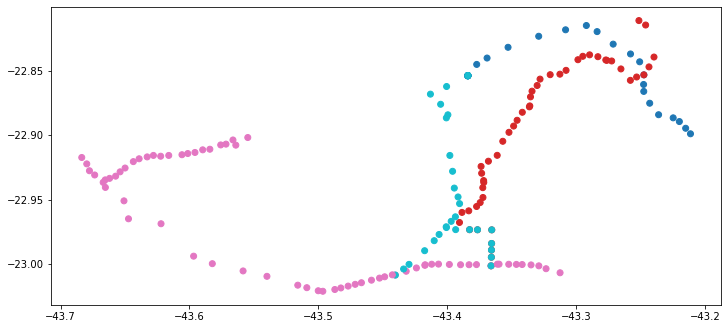

In [128]:
gpd.GeoDataFrame(estacoes_final).plot(column='corredor',  figsize=(12,12))

In [132]:
estacoes_final.to_csv('data/treated/estacoes.csv', index=False)

### Dados

- Numero de passageiros 
    - 2016
    - 2020
    - 2022
    - Futuro
    - Gráfico


In [163]:
def to_melt(df, corredor):
    df = df.melt(id_vars='PERÍODO', value_vars=[str(x) for x in list(range(2012, 2023))])
    df['corredor'] = corredor
    return df

In [170]:
oeste = to_melt(pd.read_clipboard(), 'TransOeste')

In [171]:
carioca = to_melt(pd.read_clipboard(), 'TransCarioca')

In [172]:
olimpica = to_melt(pd.read_clipboard(), 'TransOlimpica')

In [177]:
gratuidade = pd.read_clipboard()

In [179]:
passageiros = pd.concat([oeste, carioca, olimpica, gratuidade])

In [188]:
list(passageiros['PERÍODO'].unique())

['JAN',
 'FEV',
 'MAR',
 'ABR',
 'MAI',
 'JUN',
 'JUL',
 'AGO',
 'SET',
 'OUT',
 'NOV',
 'DEZ']

In [189]:
month_dict = {
 'JAN': 1,
 'FEV': 2,
 'MAR': 3,
 'ABR': 4,
 'MAI': 5,
 'JUN': 6,
 'JUL': 7,
 'AGO': 8,
 'SET': 9,
 'OUT': 10,
 'NOV': 11,
 'DEZ': 12
}

In [196]:
passageiros['dt'] = passageiros.apply(lambda x: pd.Timestamp(year=int(x['variable']), month=month_dict[x['PERÍODO']], day=1), 1)

In [208]:
passageiros['value'] = passageiros['value'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else 0)

In [218]:
passageiros = passageiros.replace({'transoeste': 'TransOeste', 'transcarioca': 'TransCarioca', 'transolimpica': 'TransOlimpica'})

<AxesSubplot:xlabel='dt'>

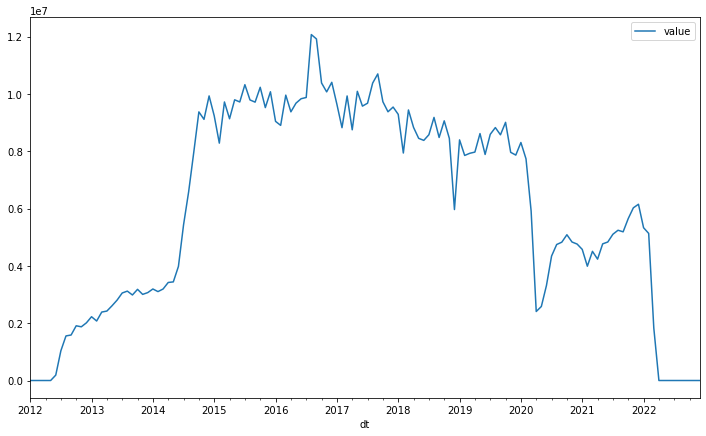

In [213]:
passageiros.groupby('dt').sum().plot(figsize=(12,7))

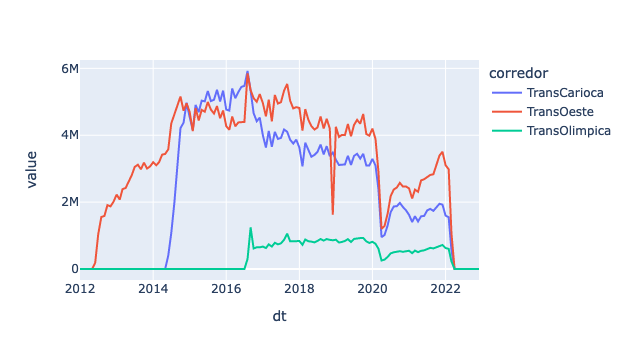

In [224]:
px.line(passageiros.groupby(['dt', 'corredor']).sum().reset_index(), x='dt', y='value', color='corredor', width=720)

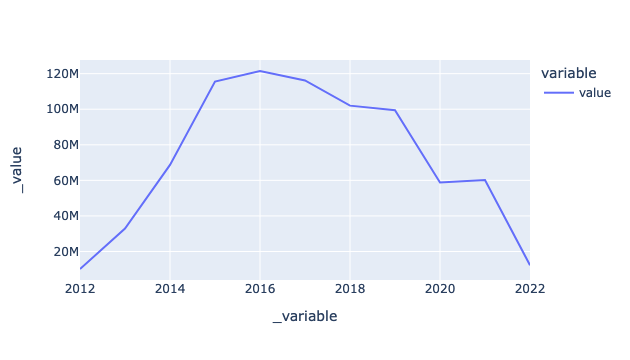

In [231]:
passageiros['variable'] = passageiros['variable'].apply(int)
passageiros.sort_values(by='variable').groupby('variable').sum()

In [234]:
passageiros_ano = passageiros.sort_values(by='variable').groupby('variable').sum().reset_index().rename(
    columns={'variable':'ano', 'value':'passageiros'}
)

In [235]:
passageiros_ano.to_csv('data/treated/passageiros_ano.csv', index=False)

### Dados

- Numero de estações
    - 2016
    - 2020
    - 2022
    - Futuro
    - Gráfico

### Dados

- Numero de veículos
    - 2016
    - 2020
    - 2022
    - Futuro
    - Gráfico

In [ ]:
DEZ/2016 ---> 436
DEZ/2020 ---> 120
DEZ/2021 ---> 245
MAR/2022 ---> 254
FUTURO   ---> 307

### Dados

- Comprimento dos corredores e número de estações por corredor
- Custo/km metro vs BRT